# Assignment 2 - Machine Learning

We chose this and did that bla bla bla...
<br>

## Part 1 - Data Preparation

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [107]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1667179502&period2=1698715502&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
1,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
2,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800
4,2022-11-04,222.600006,223.800003,203.080002,207.470001,207.470001,98622200
...,...,...,...,...,...,...,...
246,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
247,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
248,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
249,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100


### Selecting only date and the adjusted close price for the model

In [108]:
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Adj Close  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


### Converting dates to numbers from 0 to n

In [109]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.toordinal) # day as integer since 1.1.1
df.sort_values(by=['Date'], inplace=True)

In [110]:
# scaling the dates
min_date = df['Date'].min()
df['Date'] = df['Date'] - min_date

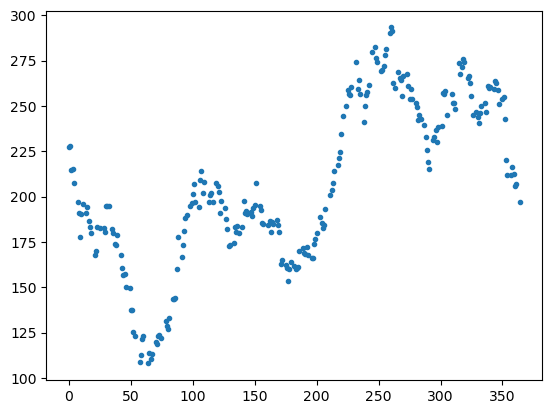

In [111]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.scatter(df.Date, df.Adj_Close, marker='.')

## Part 2 - Split data into training and testing

In [112]:
# Reshaping the data for sklearn
X = df.Date.values.reshape(-1, 1)
y = df.Adj_Close.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

## Part 3 - Polynomial Regression

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

### Finding the optimal degree

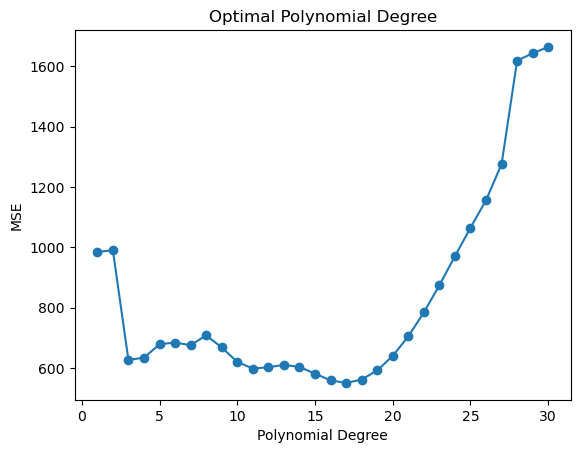

Optimal degree: 17


In [114]:
degrees = range(1, 31)
mse_values = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    # Transform input data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Evaluate model
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE values for each degree
plt.plot(degrees, mse_values, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Optimal Polynomial Degree')
plt.show()

# Find the degree with the minimum MSE
optimal_degree = degrees[np.argmin(mse_values)]
print(f"Optimal degree:", optimal_degree)

### Create model

In [115]:
# Transform input data
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [116]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

### Evaluate model

In [117]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

1663.8117321929149


In [118]:
# R2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.22738868705051962


### Prediction

In [119]:
y_pred = model.predict(X_test_poly)

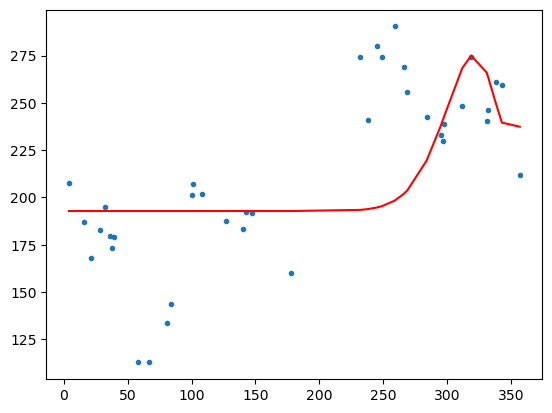

In [120]:
# Plot
sorted_indices = X_test.ravel().argsort()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, marker='.')
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.show()

In [121]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

# Get date for tomorrow
tomorrow = dt.today().toordinal() - min_date + 1

In [122]:
# Predict
y_pred = model.predict(poly.transform([[tomorrow]]))
print(y_pred)

[[37.28933048]]


## Part 4 - Trying with another model

### Imports

In [123]:
import matplotlib.dates as mdates
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

### Reading the data

In [124]:
# Lets read the most recent data, with csv as backup
try:
    # Get todays date
    cutoff = pd.Timestamp.today()

    # Convert to absolute
    cutoff = cutoff.timestamp()

    # Convert to int
    cutoff = int(cutoff)

    # Get data from yahoo finance
    source = f"https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1277769600&period2={cutoff}&interval=1d&events=history&includeAdjustedClose=true"
except:
    source = 'TSLA.csv'

df = pd.read_csv(source)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3355,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
3356,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94728100
3357,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200
3358,2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300


#### Dropping unused columns
We are only interested in the Date and Close columns so lets drop the rest.


In [125]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3360 non-null   object 
 1   Close   3360 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.6+ KB


#### Converting to datetime
Date is still an object type. So lets convert it to datetime

In [126]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set datetime as index
df.set_index('Date', inplace=True)

df.head(10)

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
2010-07-07,1.053333
2010-07-08,1.164000
2010-07-09,1.160000
2010-07-12,1.136667


#### Graph
Lets take a look at the data now.


In [127]:
# Funtion for graphing the data
def plot_close(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], color='black')
    plt.title('Tesla stock price')
    plt.xlabel('Year')
    plt.ylabel('Closing price')
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.show()

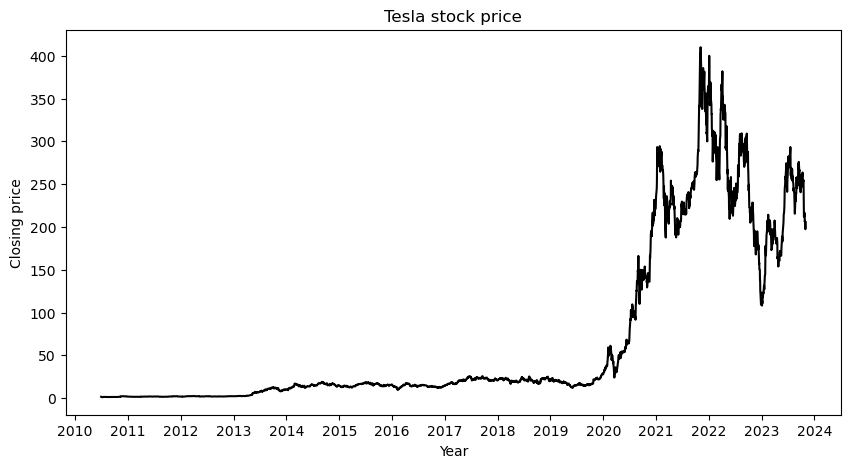

In [128]:
plot_close(df)

#### Setting a cutoff date
We see a big difference in closing price before and after 2020. As long as the company is still in business, we can assume the stock won't go back down close to zero. It will be better to treat the price after about 2020 as its own dataset.

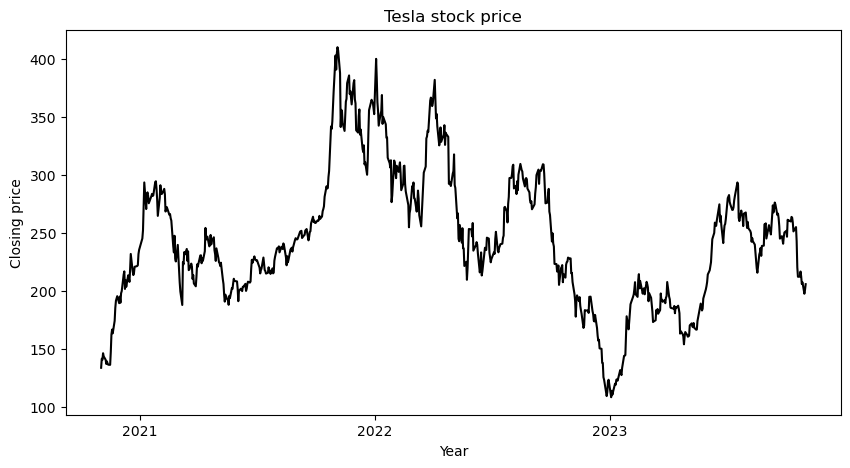

In [129]:
# Lets only look at the last three years
cutoff = pd.Timestamp.today() - pd.DateOffset(years=3)
df = df.loc[cutoff:]

# And plot again
plot_close(df)

#### Resampling
Some dates are missing (because of weekends and holydays) so lets add them


In [130]:
# Create empty rows for missing dates
df = df.resample('D').mean()

df.head(10)

,Close
Date,
2020-11-02,133.503326
2020-11-03,141.300003
2020-11-04,140.326660
2020-11-05,146.029999
2020-11-06,143.316666
2020-11-07,NaN
2020-11-08,NaN
2020-11-09,140.419998
2020-11-10,136.786667


#### Filling missing values
We are now missing some values for the Close column. Lets fill them using forward fill


In [131]:
# Forward fill the missing values
df.fillna(method='ffill', inplace=True)

df.isna().sum()
df.head(10)

,Close
Date,
2020-11-02,133.503326
2020-11-03,141.300003
2020-11-04,140.326660
2020-11-05,146.029999
2020-11-06,143.316666
2020-11-07,143.316666
2020-11-08,143.316666
2020-11-09,140.419998
2020-11-10,136.786667


### Training
To get as much information as possible for the model, we split the date into multiple parts.

#### Features

In [132]:
# We split the dataframe into multiple features (Year, Month, Week, Day, DayOfWeek, IsWeekend and IsHolyday) and target (Close)
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek + 1 # Monday=1, Sunday=7

# # Move Close to the end
cols = list(df.columns.values)
cols.pop(cols.index('Close'))
df = df[cols + ['Close']]

df.tail(10)

,Year,Month,Day,DayOfWeek,Close
Date,,,,,
2023-10-23,2023,10,23,1,212.080002
2023-10-24,2023,10,24,2,216.520004
2023-10-25,2023,10,25,3,212.419998
2023-10-26,2023,10,26,4,205.759995
2023-10-27,2023,10,27,5,207.300003
2023-10-28,2023,10,28,6,207.300003
2023-10-29,2023,10,29,7,207.300003
2023-10-30,2023,10,30,1,197.360001
2023-10-31,2023,10,31,2,200.839996


#### Training and testing data

In [133]:
# We split the dataframe into features X and target Y
X = df.drop(['Close'], axis=1)
Y = df['Close']

# We also split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# GradientBoostingRegressor model with default parameters
model = GradientBoostingRegressor()

# Then we fit the model to the training data
model.fit(x_train, y_train)

GradientBoostingRegressor()

#### Evaluation

In [134]:
# Lets look at the mean squared error of the model using the test data
mse = mean_squared_error(y_test, model.predict(x_test))
print('The mean squared error is: {:.4f}'.format(mse))

The mean squared error is: 477.5239


#### Graph
The mse was quite high. Lets try graphing the predictions.

In [135]:
# Funtion to compare the predicted and actual values
def plot_predictions(true, pred):
    plt.figure(figsize=(13, 6))
    plt.plot(df.index, true, color='black', label='Actual closing price')
    plt.plot(df.index, pred, color='red', label='Predicted closing price')
    plt.xlabel('Date')
    # Rotate
    plt.xticks(rotation=30)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.ylabel('Closing price')
    plt.title('Actual vs Predicted Closing Price')
    plt.legend()
    plt.show()

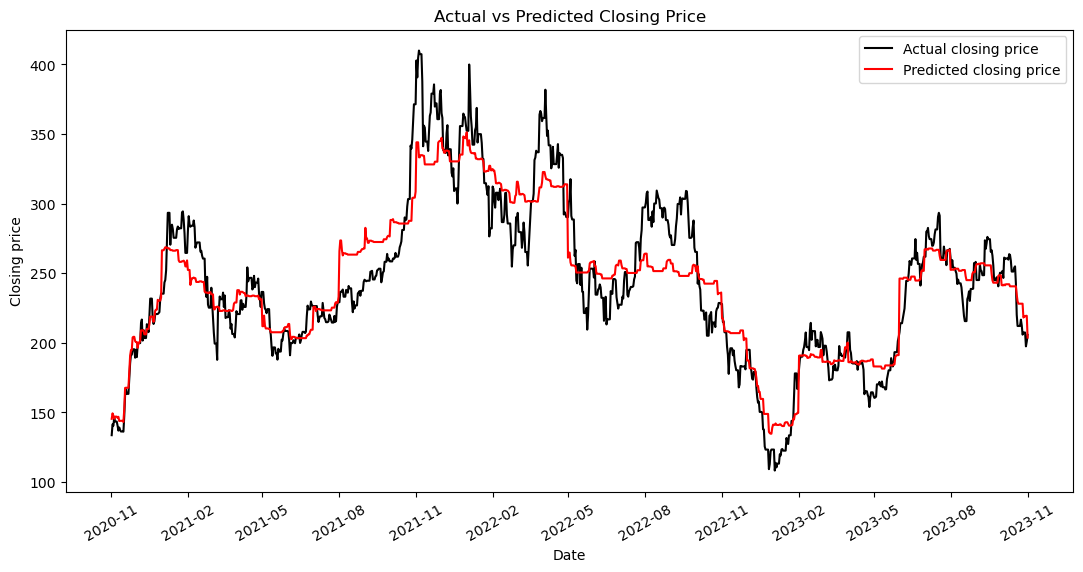

In [136]:
plot_predictions(Y, model.predict(X))

### Tuning
We can do with some improvement. Lets create a funtion to tune the hyperparameters of our model.

#### Tuning function

In [137]:

def get_best_estimator(model, iterations=250):
    '''
    This function performs a RandomizedSearchCV to find the best parameters for the model.
    It returns the best model and the best parameters.

    Parameters:
        model (GradientBoostingRegressor): A GradientBoostingRegressor model.
        iterations (int): The number of iterations to perform the RandomizedSearchCV.
    '''
    
    # We create a dictionary with the parameters we want to test
    distrubutions = {
        'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'n_estimators': [10, 25, 50, 100, 250, 500, 750],
        'criterion': ['friedman_mse', 'squared_error'],
        'min_samples_split': [2, 4, 6, 8, 10],
        'max_depth': [2, 4, 6, 8, 10],
    }

    # We create a RandomizedSearchCV object
    search = RandomizedSearchCV(
        model,
        param_distributions=distrubutions,
        n_iter=iterations,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=5,
    )

    # We fit the model to the training data
    search.fit(x_train, y_train)

    # We get the best model
    best_estimator = search.best_estimator_

    # We get the best parameters
    best_params = search.best_params_

    # Return the best model and best parameters
    return best_estimator, best_params

#### Best parameters

In [138]:
# These are the best params from previously running the get_best_estimator function
# At first the model was overfitting, so tweaked the parameters to get a better fit
best_params = {
    'n_estimators': 5000,
    'min_samples_split': 6,
    'max_depth': 12,
    'loss': 'squared_error',
    'learning_rate': 0.0005,
    'criterion': 'friedman_mse',
    'random_state': 1,
    }

model_tuned = GradientBoostingRegressor(**best_params)

# We fit the tuned model to the training data
model_tuned.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.0005, max_depth=12,
                          min_samples_split=6, n_estimators=5000,
                          random_state=1)

#### Running the tuning function

In [139]:
# If you want to run the get_best_estimator function again you can uncomment the line below.
# This will take a while to run.

# model_tuned, best_params = get_best_estimator(model, 500)

best_params

{'n_estimators': 5000,
 'min_samples_split': 6,
 'max_depth': 12,
 'loss': 'squared_error',
 'learning_rate': 0.0005,
 'criterion': 'friedman_mse',
 'random_state': 1}

In [140]:
# Lets calculate the mean squared error of the tuned model
mse_new = mean_squared_error(y_test, model_tuned.predict(x_test))
print('The mean squared error is: {:.4f}'.format(mse_new))

The mean squared error is: 88.4144


In [141]:
# Lets look at the improvement in MSE compared to the default model
print('The mean squared error improvement: {:.2f}%'.format(
    (mse - mse_new) / mse * 100))

The mean squared error improvement: 81.48%


#### Evaluation
As we can see, tuning the hyperparameters improved the mse by a lot.

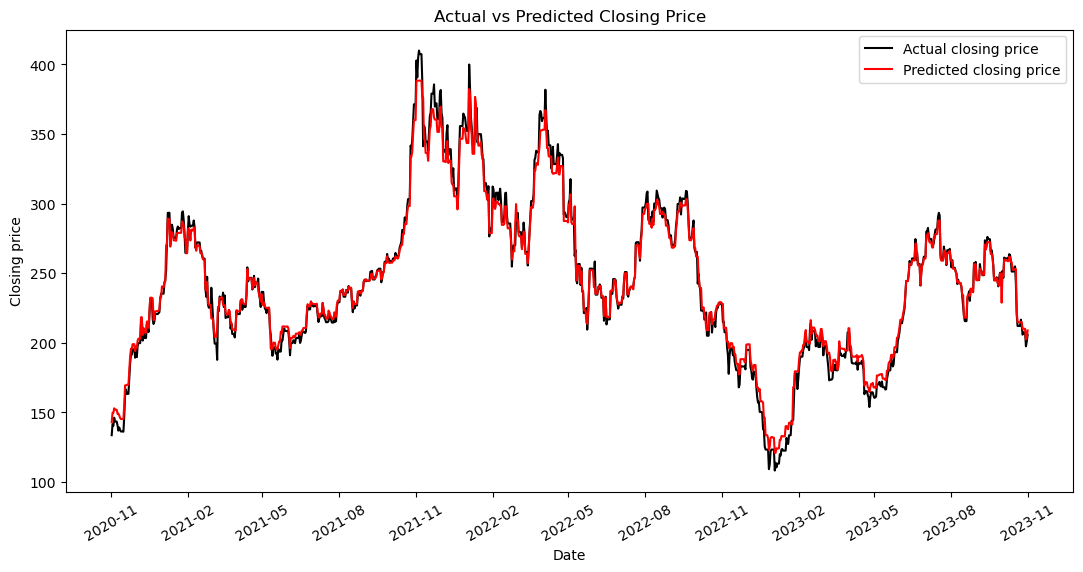

In [142]:
# This is also apparent when we graph the predicted values of the tuned model.
plot_predictions(Y, model_tuned.predict(X))

In [143]:
#### Overfitting

In [144]:
# Lets test for overfitting by comparing the MSE of the training data and the test data
mse_train = mean_squared_error(y_train, model_tuned.predict(x_train))
mse_test = mean_squared_error(y_test, model_tuned.predict(x_test))

print('The mean squared error of the training data is: {:.4f}'.format(mse_train))
print('The mean squared error of the test data is: {:.4f}'.format(mse_test))

# if the MSE of the training data is much lower than the MSE of the test data, then the model is overfitting

The mean squared error of the training data is: 24.1765
The mean squared error of the test data is: 88.4144


### Importances
Lets have a look at the importances of the features.

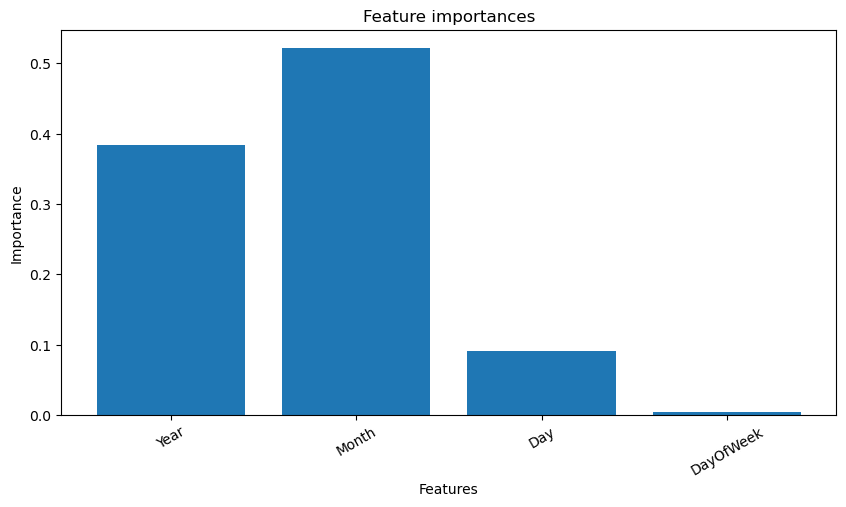

In [145]:
# We can read the feature importances from the model
plt.figure(figsize=(10, 5))
plt.bar(x_train.columns, model_tuned.feature_importances_)
plt.title('Feature importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=30)
plt.show()

### Future predictions
Lets create a function to calculate the price for a given date.


In [146]:
def predict_closing_price(model, date):
    # Create a DataFrame with the given date
    df_temp = pd.DataFrame({'Date': [date]})

    # Extract features from the date
    df_temp['Year'] = df_temp['Date'].dt.year
    df_temp['Month'] = df_temp['Date'].dt.month
    df_temp['Day'] = df_temp['Date'].dt.day
    df_temp['DayOfWeek'] = df_temp['Date'].dt.dayofweek + 1

    # Prepare the input data for prediction
    X = df_temp.drop(['Date'], axis=1)

    # Make the prediction
    predicted_price = model.predict(X)

    return predicted_price[0]

#### We can now make predictions for the future stock prices

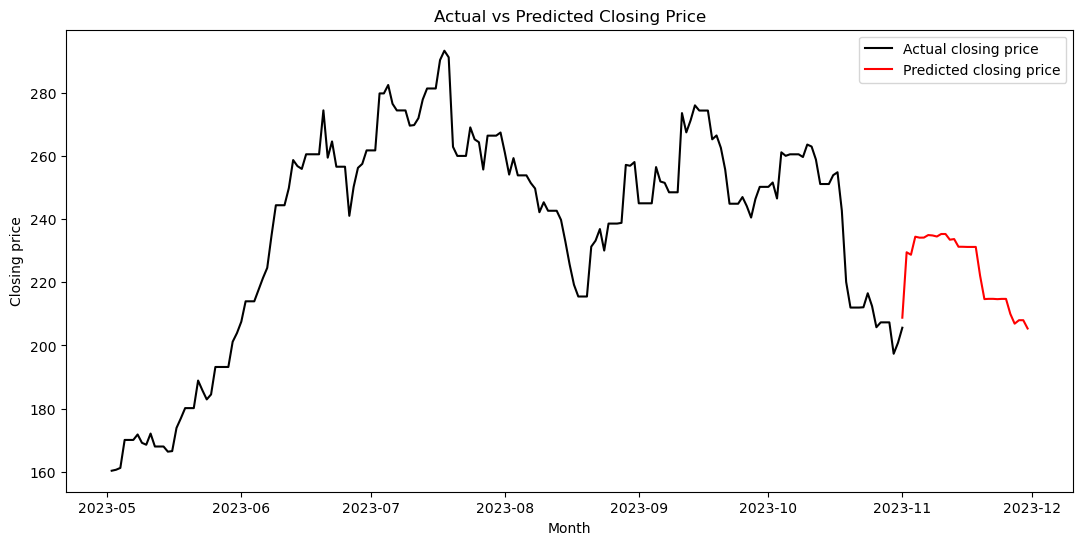

In [147]:
# Lets try a range of days spanning (periods) days from the last date in the dataset
dates = pd.date_range(df.index[-1], periods=30, freq='D')

# We predict the closing price of TSLA for every day in the date range
predicted_prices = []
for date in dates:
    predicted_prices.append(predict_closing_price(model_tuned, date))

# And make a dataframe with the predicted prices
df_predictions = pd.DataFrame(
    {'Date': dates, 'Close': predicted_prices}).set_index('Date')

# Starting date for the graph
graph_start = pd.Timestamp.today() - pd.DateOffset(months=6)

# We graph the future prediction as a continuation of the actual data
plt.figure(figsize=(13, 6))
plt.plot(Y.loc[graph_start:].index, Y.loc[graph_start:] , color='black', label='Actual closing price')
plt.plot(df_predictions.index, df_predictions['Close'], color='red', label='Predicted closing price')
plt.xlabel('Month')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.ylabel('Closing price')
plt.title('Actual vs Predicted Closing Price')
plt.legend()
plt.show()